In [34]:
from sklearn.decomposition import PCA
import numpy as np

data = np.genfromtxt("C:/Users/jackl/PycharmProjects/Data Mining/two.csv")



pca = PCA()



 
 


In [35]:
def standardize(arr):
    mean_val = np.mean(arr)
    std_val = np.std(arr)
    standardized_arr = (arr - mean_val) / std_val
    return standardized_arr

In [36]:
std_data = standardize(data)

pca.fit(std_data)

PCA()

In [37]:
pca.explained_variance_

array([0.05896456, 0.00011009])

In [38]:
pca.explained_variance_ratio_

array([0.99813637, 0.00186363])

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

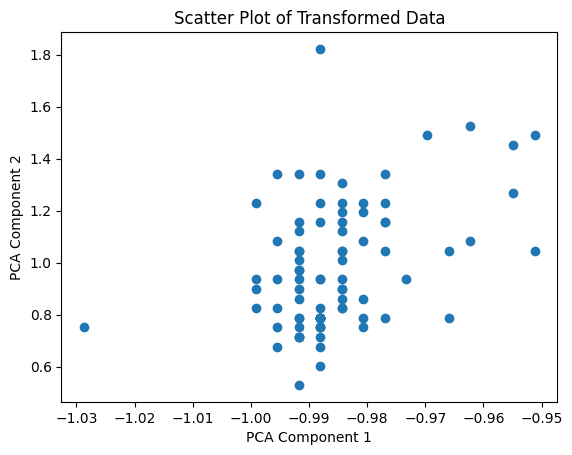

In [47]:
plt.scatter(std_data[:, 0], std_data[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of std Data')
plt.show()

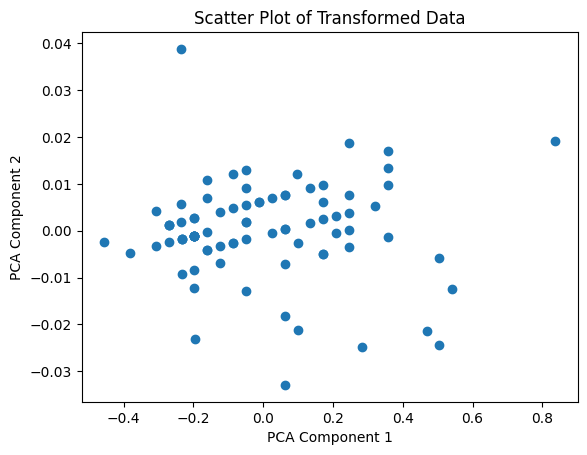

In [48]:
# b) Transformation der Daten
transformed_data = pca.transform(std_data)

# Streudiagramm der transformierten Daten
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of Transformed Data')
plt.show()



In [55]:
import numpy as np


# Berechnung des Rotationswinkels
rotation_matrix = pca.components_

print(rotation_matrix)

first_principal_component = rotation_matrix[0]
angle_radians = np.arctan2(first_principal_component[1], first_principal_component[0])
angle_degrees = np.degrees(angle_radians)

print("Rotationswinkel gegen den Uhrzeigersinn:", angle_degrees)


[[ 0.01948034  0.99981024]
 [-0.99981024  0.01948034]]
Rotationswinkel gegen den Uhrzeigersinn: 88.88378791977557


Korrelationsmatrix der transformierten Daten:
[[ 1.  1. -1. ... -1. -1.  1.]
 [ 1.  1. -1. ... -1. -1.  1.]
 [-1. -1.  1. ...  1.  1. -1.]
 ...
 [-1. -1.  1. ...  1.  1. -1.]
 [-1. -1.  1. ...  1.  1. -1.]
 [ 1.  1. -1. ... -1. -1.  1.]]


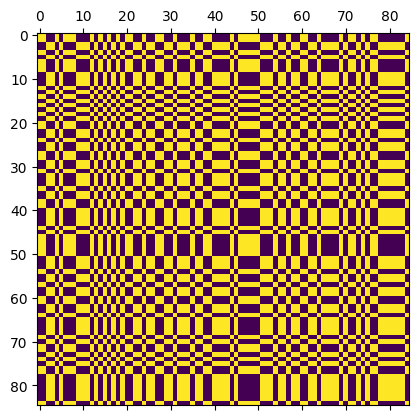

In [50]:
# c) Bestimmung der Korrelationsmatrix der transformierten Daten
correlation_matrix = np.corrcoef(transformed_data)
print("Korrelationsmatrix der transformierten Daten:")
print(correlation_matrix)

plt.matshow(correlation_matrix)


In [44]:
import pandas as pd 

In [52]:
# c) Bestimmung der Korrelationsmatrix der transformierten Daten
correlation_matrix = pd.DataFrame(transformed_data).corr()
print("Korrelationsmatrix der transformierten Daten:")
print(correlation_matrix)


Korrelationsmatrix der transformierten Daten:
              0             1
0  1.000000e+00  2.988874e-17
1  2.988874e-17  1.000000e+00


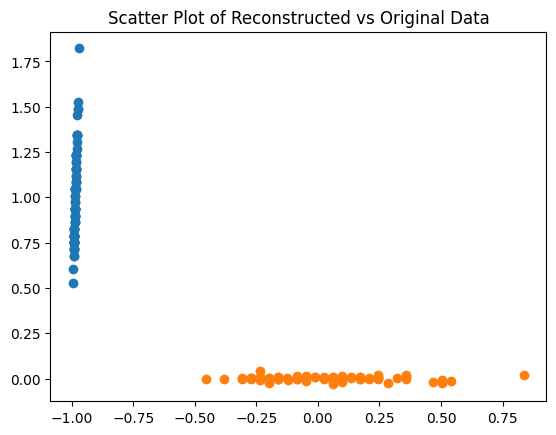

In [57]:
# d) Reduzierung der Daten auf eine Dimension und Rucktransformation
pca_1d = PCA(n_components=1)
reduced_data = pca_1d.fit_transform(std_data)
reconstructed_data = pca_1d.inverse_transform(reduced_data)

# Streudiagramm der reduzierten Daten und originalen Daten
#plt.scatter(reconstructed_data, data)


plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1])
#plt.scatter(std_data[:, 0], std_data[:, 1])
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])


plt.title('Scatter Plot of Reconstructed vs Original Data')
plt.show()
